In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
warnings.filterwarnings('ignore')

### Load Datasets

In [2]:
train_path = '/home/mai/workspace/titanic_prediction/data/train.csv'
test_path = '/home/mai/workspace/titanic_prediction/data/test.csv'
df = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

print('The shape of the training dataset is:', df.shape)
print('The shape of the test dataset is:', test_data.shape)

The shape of the training dataset is: (891, 12)
The shape of the test dataset is: (418, 11)


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Categorize Age Data

In [23]:
#Age Distribution
print(df['Age'].value_counts(bins=5, sort=False))

Age
(0.339, 16.336]     100
(16.336, 32.252]    346
(32.252, 48.168]    188
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: count, dtype: int64


In [6]:
#Create a new columns 'AgeCat' to categorize 'Age'
df.loc[df['Age'] <= 16, 'AgeCat'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'AgeCat'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'AgeCat'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'AgeCat'] = 3
df.loc[(df['Age'] > 64), 'AgeCat'] = 4

### Select Columns to Dive Deep

This perdiction exercise does not use the following columns:
- 'PassengerId', 'Name', 'Ticket': Specific info which will not be directly relevant to the prediction result
- 'Cabin': Only 204 rows out of 891 are non-null

In [7]:
#Columns to dive deep
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_columns = ['Survived', 'Pclass', 'Sex', 'Embarked']

### Plot Sex and Ticket Class

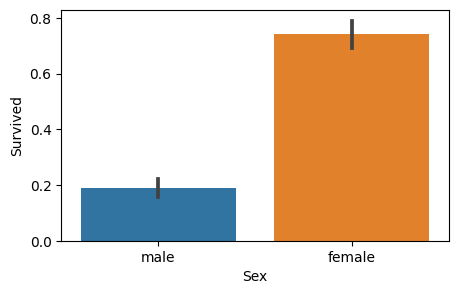

            mean  count
Sex                    
female  0.742038    314
male    0.188908    577


In [8]:
#Plot Survival Result by Sex
feature = 'Sex'
plot_data = pd.concat([df['Survived'], df[feature]], axis=1)
f, ax = plt.subplots(figsize=(5, 3))
fig = sns.barplot(x=feature, y='Survived', data=plot_data)
plt.show()
print(df.groupby(by=feature)['Survived'].agg(['mean', 'count']))

Note: Female survival rate is 0.74 and male survival rate is 0.19.

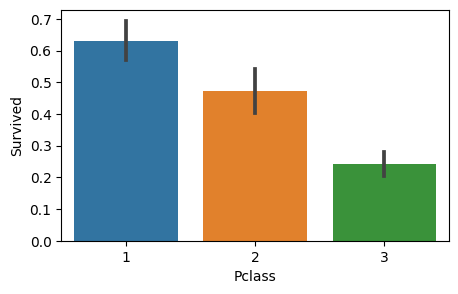

            mean  count
Pclass                 
1       0.629630    216
2       0.472826    184
3       0.242363    491


In [9]:
#Plot Survival Result BY Ticket Class
feature = 'Pclass'
plot_data = pd.concat([df['Survived'], df[feature]], axis=1)
f, ax = plt.subplots(figsize=(5, 3))
fig = sns.barplot(x=feature, y='Survived', data=plot_data)
plt.show()
print(df.groupby(by=feature)['Survived'].agg(['mean', 'count']))

Note: Survival rate of higher ticket class is higher - 1st Class: 0.63, 2nd Class 0.47, 3rd Class 0.24

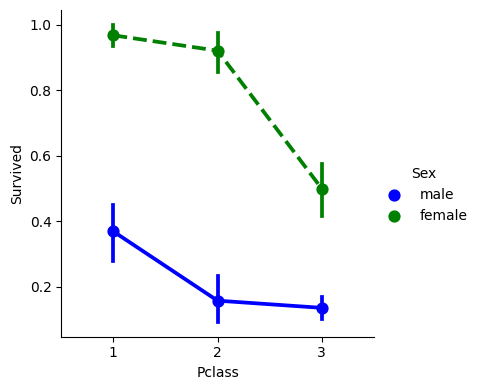

                   mean  count
Sex    Pclass                 
female 1       0.968085     94
       2       0.921053     76
       3       0.500000    144
male   1       0.368852    122
       2       0.157407    108
       3       0.135447    347


In [10]:
#Plot Survival Result by Sex and Ticket Class
plot_data = pd.concat([df['Survived'], df['Sex'], df['Pclass']], axis=1)
sns.catplot(data=plot_data, x='Pclass', y='Survived', hue='Sex', kind='point', \
            height=4, aspect=1, linestyles=["-", "--"], palette={"male": "b", "female": "g"},)
plt.show()
print(df.groupby(by=['Sex', 'Pclass'])['Survived'].agg(['mean', 'count']))

### Plot Port of Embarkation

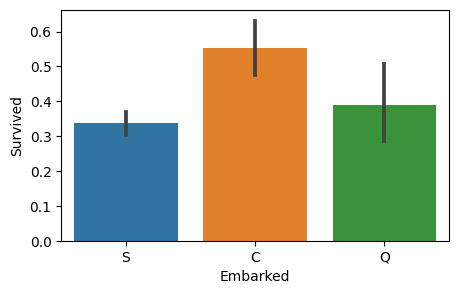

              mean  count
Embarked                 
C         0.553571    168
Q         0.389610     77
S         0.336957    644


In [11]:
#Plot Port Survival Result by Port of Embarkation
# C = Cherbourg, Q = Queenstown, S = Southampton
feature = 'Embarked'
plot_data = pd.concat([df['Survived'], df[feature]], axis=1)
f, ax = plt.subplots(figsize=(5, 3))
fig = sns.barplot(x=feature, y='Survived', data=plot_data)
plt.show()
print(df.groupby(by=feature)['Survived'].agg(['mean', 'count']))

Note: Survival rate of passengers who embarked at Cherbourg is higher (0.55) than those who embarked at Queenstown (0.39) or Southampton (0.34).

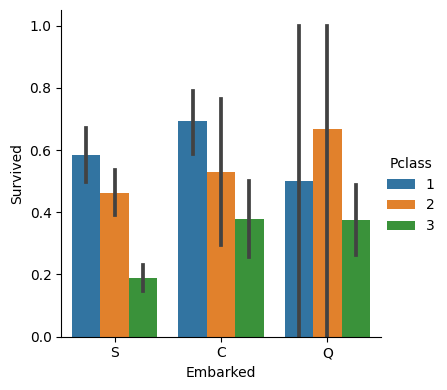

                     mean  count
Embarked Pclass                 
C        1       0.694118     85
         2       0.529412     17
         3       0.378788     66
Q        1       0.500000      2
         2       0.666667      3
         3       0.375000     72
S        1       0.582677    127
         2       0.463415    164
         3       0.189802    353


In [12]:
#Plot Survival Result by Port of Embarkation and Ticket Class
plot_data = pd.concat([df['Survived'], df['Embarked'], df['Pclass']], axis=1)
sns.catplot(x='Embarked', y='Survived', data=plot_data, hue='Pclass', kind='bar', height=4)
plt.show()
print(df.groupby(by=['Embarked', 'Pclass'])['Survived'].agg(['mean', 'count']))

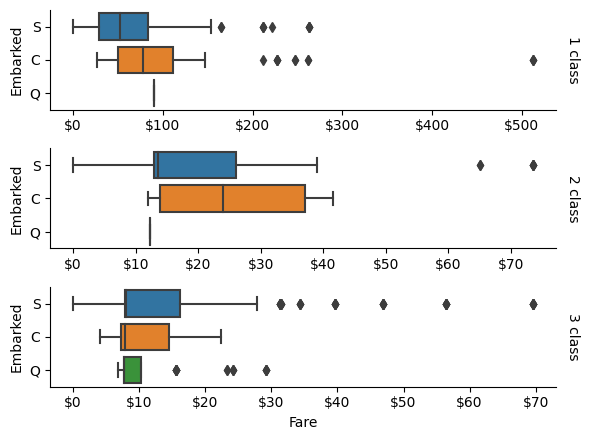

In [13]:
#Plot Passenger Fare by Port of Embarkation and Ticket Class
plot_data = pd.concat([df['Fare'], df['Embarked'], df['Pclass']], axis=1)
fig = sns.catplot(data=plot_data, x='Fare', y='Embarked', row='Pclass', kind='box', orient="h", \
            sharex=False, margin_titles=True, height=1.5, aspect=4)
fig.set_titles(row_template="{row_name} class")
for ax in fig.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')

### Plot Age

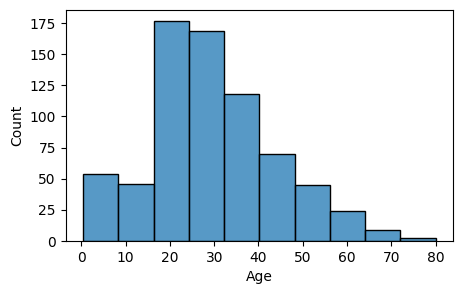

In [25]:
#Age Histogram
f, ax = plt.subplots(figsize=(5, 3))
sns.histplot(data=df['Age'], bins=10)
plt.show()

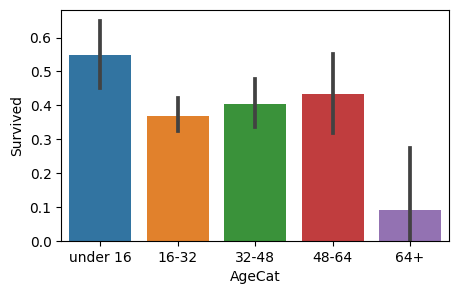

            mean  count
AgeCat                 
0.0     0.550000    100
1.0     0.369942    346
2.0     0.404255    188
3.0     0.434783     69
4.0     0.090909     11


In [22]:
#Plot Survival Result by Age Category
feature = 'AgeCat'
plot_data = pd.concat([df['Survived'], df[feature]], axis=1)
f, ax = plt.subplots(figsize=(5, 3))
fig = sns.barplot(x=feature, y='Survived', data=plot_data)
ax.set(xticklabels=['under 16', '16-32', '32-48', '48-64', '64+'])
plt.show()
print(df.groupby(by=feature)['Survived'].agg(['mean', 'count']))

Note: Children's survive rate is higher than adults: survival rate of passengers under 16 years-old is 0.55

### Select Features for Prediction Model

In [27]:
numerical_features = ['Age', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']
model_features = numerical_features + categorical_features
model_target = 'Surviced'